In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Ucitavanje podataka iz fajlova

train_v = np.loadtxt('/content/drive/MyDrive/BTC-USD-train2.csv', usecols=(4), skiprows=1, delimiter=',', dtype=np.str)

test_v = np.loadtxt('/content/drive/MyDrive/BTC-USD-test2.csv', usecols=(4), skiprows=1, delimiter=',', dtype=np.str)

# Pomocna funkcija za ciscenje podataka
def remove_null(val):
    if val != 'null':
        return val
    pass

# Ciscenje (null vrednosti) i konverzija u float za train set
train_v = list(map(remove_null, train_v))
train_v = np.array(train_v)
train_v = train_v.astype(np.float)
train_v = train_v[np.logical_not(np.isnan(train_v))]
train_v = np.reshape(train_v, (train_v.shape[0], 1))

# Skaliranje podataka izmedju 0 i 1
scaler = MinMaxScaler(feature_range=(0,1))
train_v_scaled = scaler.fit_transform(train_v)

# Ciscenje (null vrednosti) i konverzija u float za test set
test_v = list(map(remove_null, test_v))
test_v = np.array(test_v)
test_v = test_v.astype(np.float)
test_v = test_v[np.logical_not(np.isnan(test_v))]
test_v = np.reshape(test_v, (test_v.shape[0], 1))

# Skaliranje podataka izmedju 0 i 1
test_v_scaled = scaler.transform(test_v)
test_v_scaled = test_v_scaled.reshape(-1,1)

print(train_v_scaled.shape)
print(test_v_scaled.shape)

# Postavljamo u trening skupu np array za 30 dana unazad
X_train = []
Y_train = [] 

for i in range(30, train_v_scaled.shape[0]):
    X_train.append(train_v_scaled[i-30:i,0])
    Y_train.append(train_v_scaled[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

# Spajanje podataka da bismo izracunali np array za 30 dana unazad za test (poslednjih 30 iz trening podataka za prvih 30 iz test podataka)
combine = np.concatenate((train_v_scaled, test_v_scaled))
print(combine.shape[0])
X_test = []

for i in range(combine.shape[0] - test_v_scaled.shape[0], combine.shape[0]):
    X_test.append(combine[i-30:i,0])
X_test = np.array(X_test)
print(X_test.shape)

(914, 1)
(212, 1)
(884, 30)
(884,)
1126
(212, 30)


In [4]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN, LSTM, GRU
from keras.datasets import imdb
import numpy as np
import math
from matplotlib import pyplot as plt

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print(train_v.shape)

batch_size = 30
num_epochs = 50

(884, 30, 1)
(914, 1)


In [ ]:
# **********************SimpleRNN****************************
model = Sequential()
# Prvi sloj
model.add(SimpleRNN(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(SimpleRNN(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Drugi sloj
model.add(SimpleRNN(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model.add(SimpleRNN(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))

# Treci sloj
model.add(SimpleRNN(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model.add(SimpleRNN(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))

# Cetvrti sloj
model.add(SimpleRNN(units=50, dropout=0.2, recurrent_dropout=0.2))
# model.add(SimpleRNN(units=50, dropout=0.3, recurrent_dropout=0.3))

# Izlazni sloj
model.add(Dense(units=1))

In [ ]:
# **********************GRU****************************
model = Sequential()
# Prvi sloj
model.add(GRU(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(GRU(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Drugi sloj
model.add(GRU(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model.add(GRU(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))

# Treci sloj
model.add(GRU(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model.add(GRU(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))

# Cetvrti sloj
model.add(GRU(units=50, dropout=0.2, recurrent_dropout=0.2))
# model.add(GRU(units=50, dropout=0.3, recurrent_dropout=0.3))

# Izlazni sloj
model.add(Dense(units=1))

In [6]:
# **********************LSTM****************************
model = Sequential()
# Prvi sloj
model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(LSTM(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Drugi sloj
model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model.add(LSTM(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))

# Treci sloj
model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model.add(LSTM(units=50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))

# Cetvrti sloj
model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2))
# model.add(LSTM(units=50, dropout=0.3, recurrent_dropout=0.3))

# Izlazni sloj
model.add(Dense(units=1))

In [7]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epochs)

Epoch 1/50
30/30 [==============================] - 42s 145ms/step - loss: 0.0354
Epoch 2/50
30/30 [==============================] - 4s 144ms/step - loss: 0.0090
Epoch 3/50
30/30 [==============================] - 4s 142ms/step - loss: 0.0081
Epoch 4/50
30/30 [==============================] - 4s 141ms/step - loss: 0.0058
Epoch 5/50
30/30 [==============================] - 4s 141ms/step - loss: 0.0075
Epoch 6/50
30/30 [==============================] - 4s 143ms/step - loss: 0.0074
Epoch 7/50
30/30 [==============================] - 4s 142ms/step - loss: 0.0055
Epoch 8/50
30/30 [==============================] - 4s 143ms/step - loss: 0.0058
Epoch 9/50
30/30 [==============================] - 4s 140ms/step - loss: 0.0058
Epoch 10/50
30/30 [==============================] - 4s 146ms/step - loss: 0.0058
Epoch 11/50
30/30 [==============================] - 4s 138ms/step - loss: 0.0047
Epoch 12/50
30/30 [==============================] - 4s 143ms/step - loss: 0.0059
Epoch 13/50
30/30 [=====

In [8]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Bitcoin Price')
    plt.plot(predicted, color='blue',label='Predicted Bitcoin Price')
    plt.title('Bitcoin Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Bitcoin Price')
    plt.legend()
    plt.show()

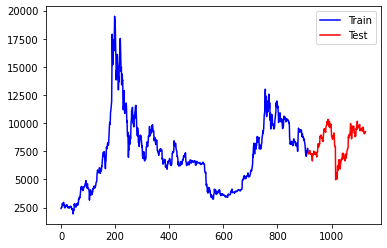

In [9]:
x_train = []
for i in range(0, train_v.shape[0]):
  x_train.append(i)
plt.plot(x_train,train_v, color = 'blue', label = 'Train')
x_test = []
for i in range(0, test_v.shape[0]):
  x_test.append(train_v.shape[0] + i)
plt.plot(x_test, test_v, color = 'red', label = 'Test')
plt.legend()
plt.show()

(212, 30)


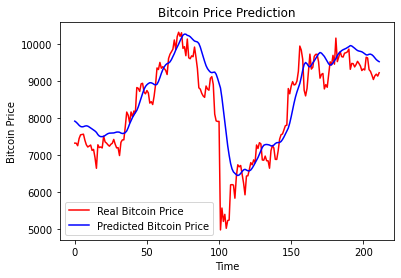

In [10]:
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_bitcoin_price = model.predict(X_test)
predicted_bitcoin_price = scaler.inverse_transform(predicted_bitcoin_price)

plot_predictions(test_v, predicted_bitcoin_price)

In [11]:
from sklearn.metrics import mean_squared_error
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
return_rmse(test_v,predicted_bitcoin_price)

The root mean squared error is 674.7007768040528.
